In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist,pdist

In [4]:
df = pd.read_csv("data.csv",header=None)
df

,0,1
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [5]:
df.shape

(8, 2)

In [7]:
X=df.values

In [8]:
X

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

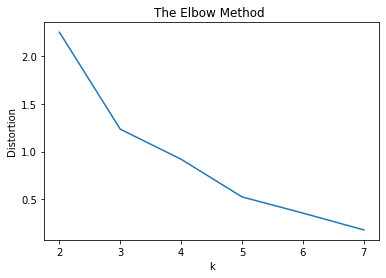

In [9]:
distortions = []
Ks = [2, 3, 4, 5, 6, 7]
for k in Ks:
    kmeans = KMeans(n_clusters = k)
    model = kmeans.fit(X)
    centers = model.cluster_centers_
    distortions.append(sum(np.min(cdist(X,centers, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(Ks, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ')
plt.show()

# SINGLE

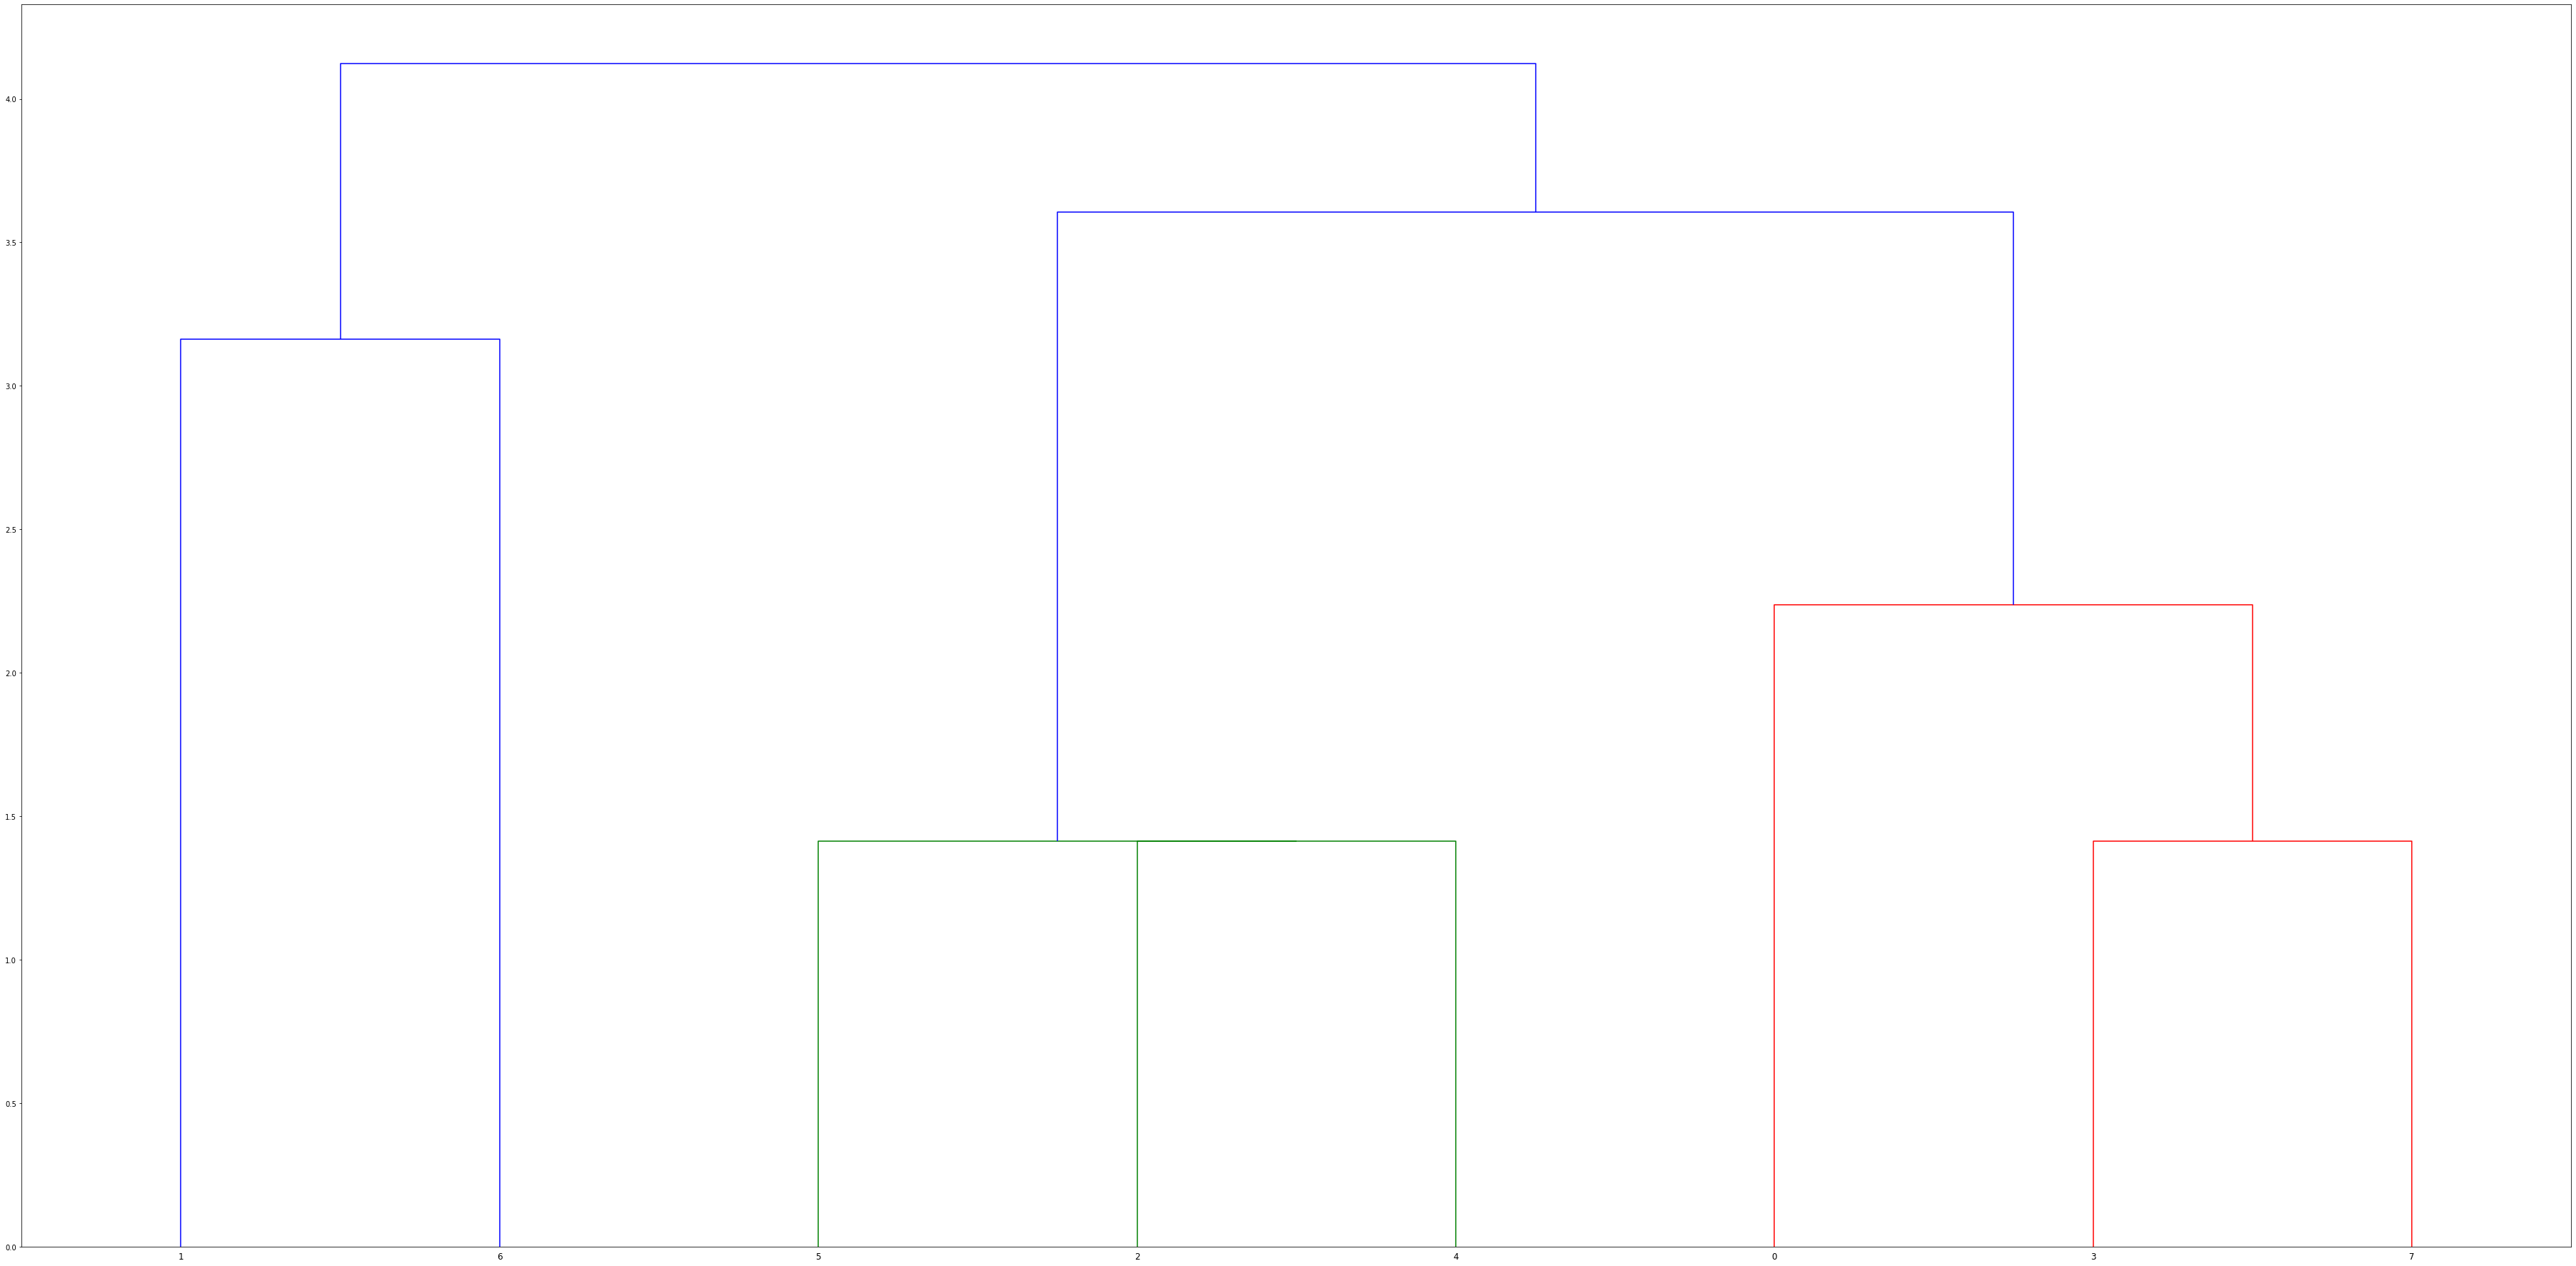

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

linked1 = linkage(X, 'single')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked1,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

In [23]:
c1=cophenet(linked1,pdist(X))
c1

(0.501683091756393,
 array([0.00069311, 0.0009498 , 0.00217511, ..., 0.00489925, 0.00489925,
        0.00218404]))

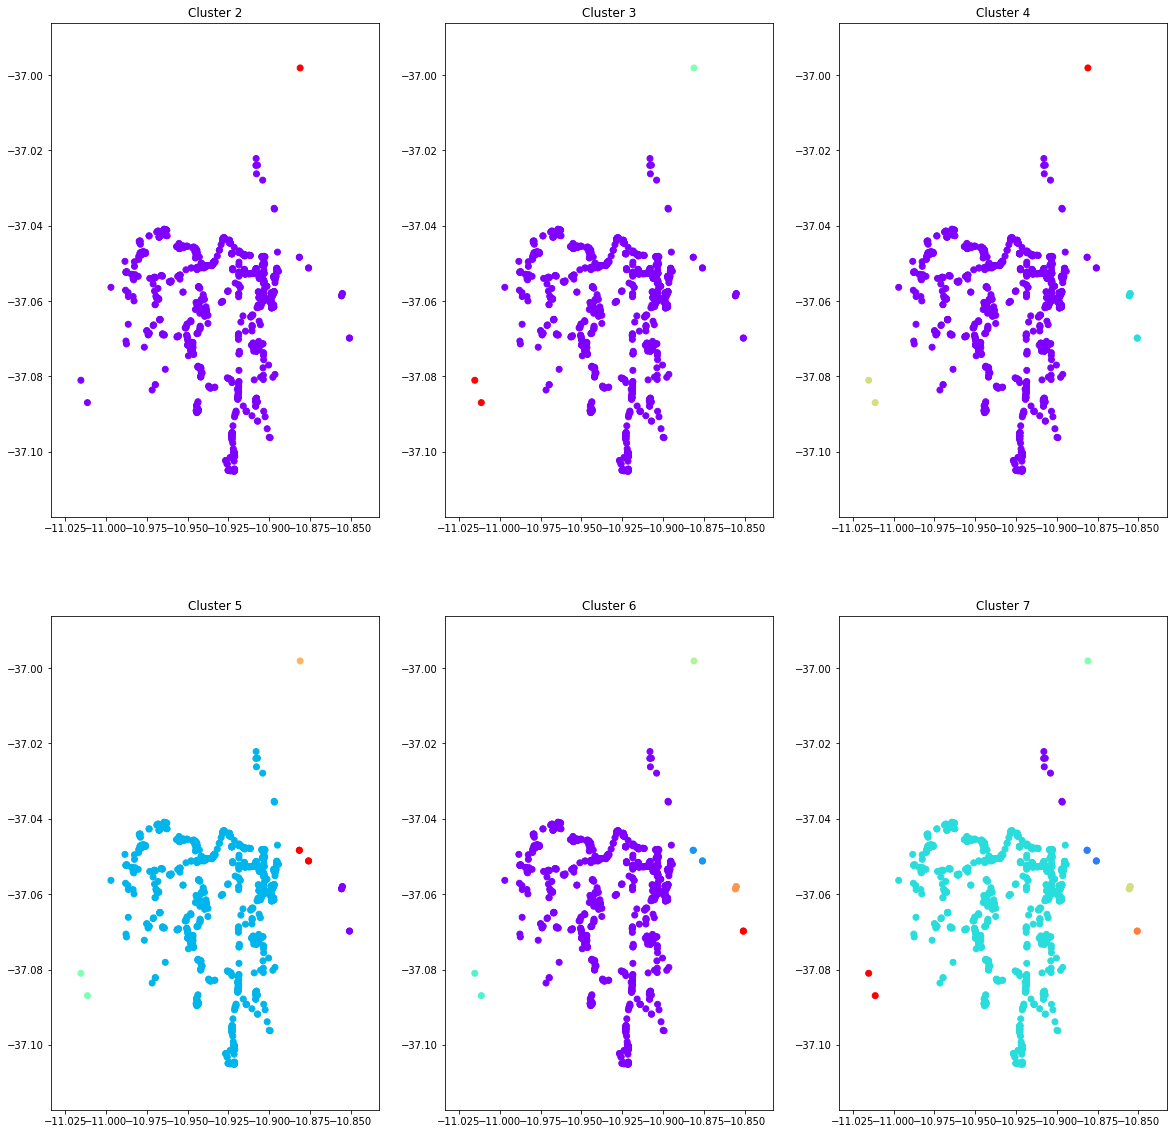

In [55]:
from sklearn.cluster import AgglomerativeClustering
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,20))
j=0
k=0
for i in [2,3,4,5,6,7]:
    
    clusters=[]
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    clusters.append(cluster.fit_predict(X)) 
    axes[k,j].title.set_text("Cluster "+str(i))
    axes[k,j].scatter(X[:,0], X[:,1], c=cluster.labels_,cmap='rainbow') 
    j+=1
    if(j==3):
        k+=1
        j=0
    if(k==3):
        break
    

In [63]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single') 

In [66]:
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Davies Bouldin Index

In [67]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X,cluster.labels_)
db_score

0.4571351972460979

# Dunn Index

In [70]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [80]:
dic = {0:[],1:[],2:[],3:[],4:[],5:[]}
pt=1
for x in cluster.labels_:
    dic[x].append(pt)
    pt+=1

In [86]:
dunn_score = dunn([dic[0],dic[1],dic[2],dic[3],dic[4]])
dunn_score

0.0012360939431396785

# Silhouette

In [88]:
from sklearn.metrics import silhouette_score

In [90]:
ss = silhouette_score(X,cluster.labels_)
ss

0.17451824982707576

# COMPLETE

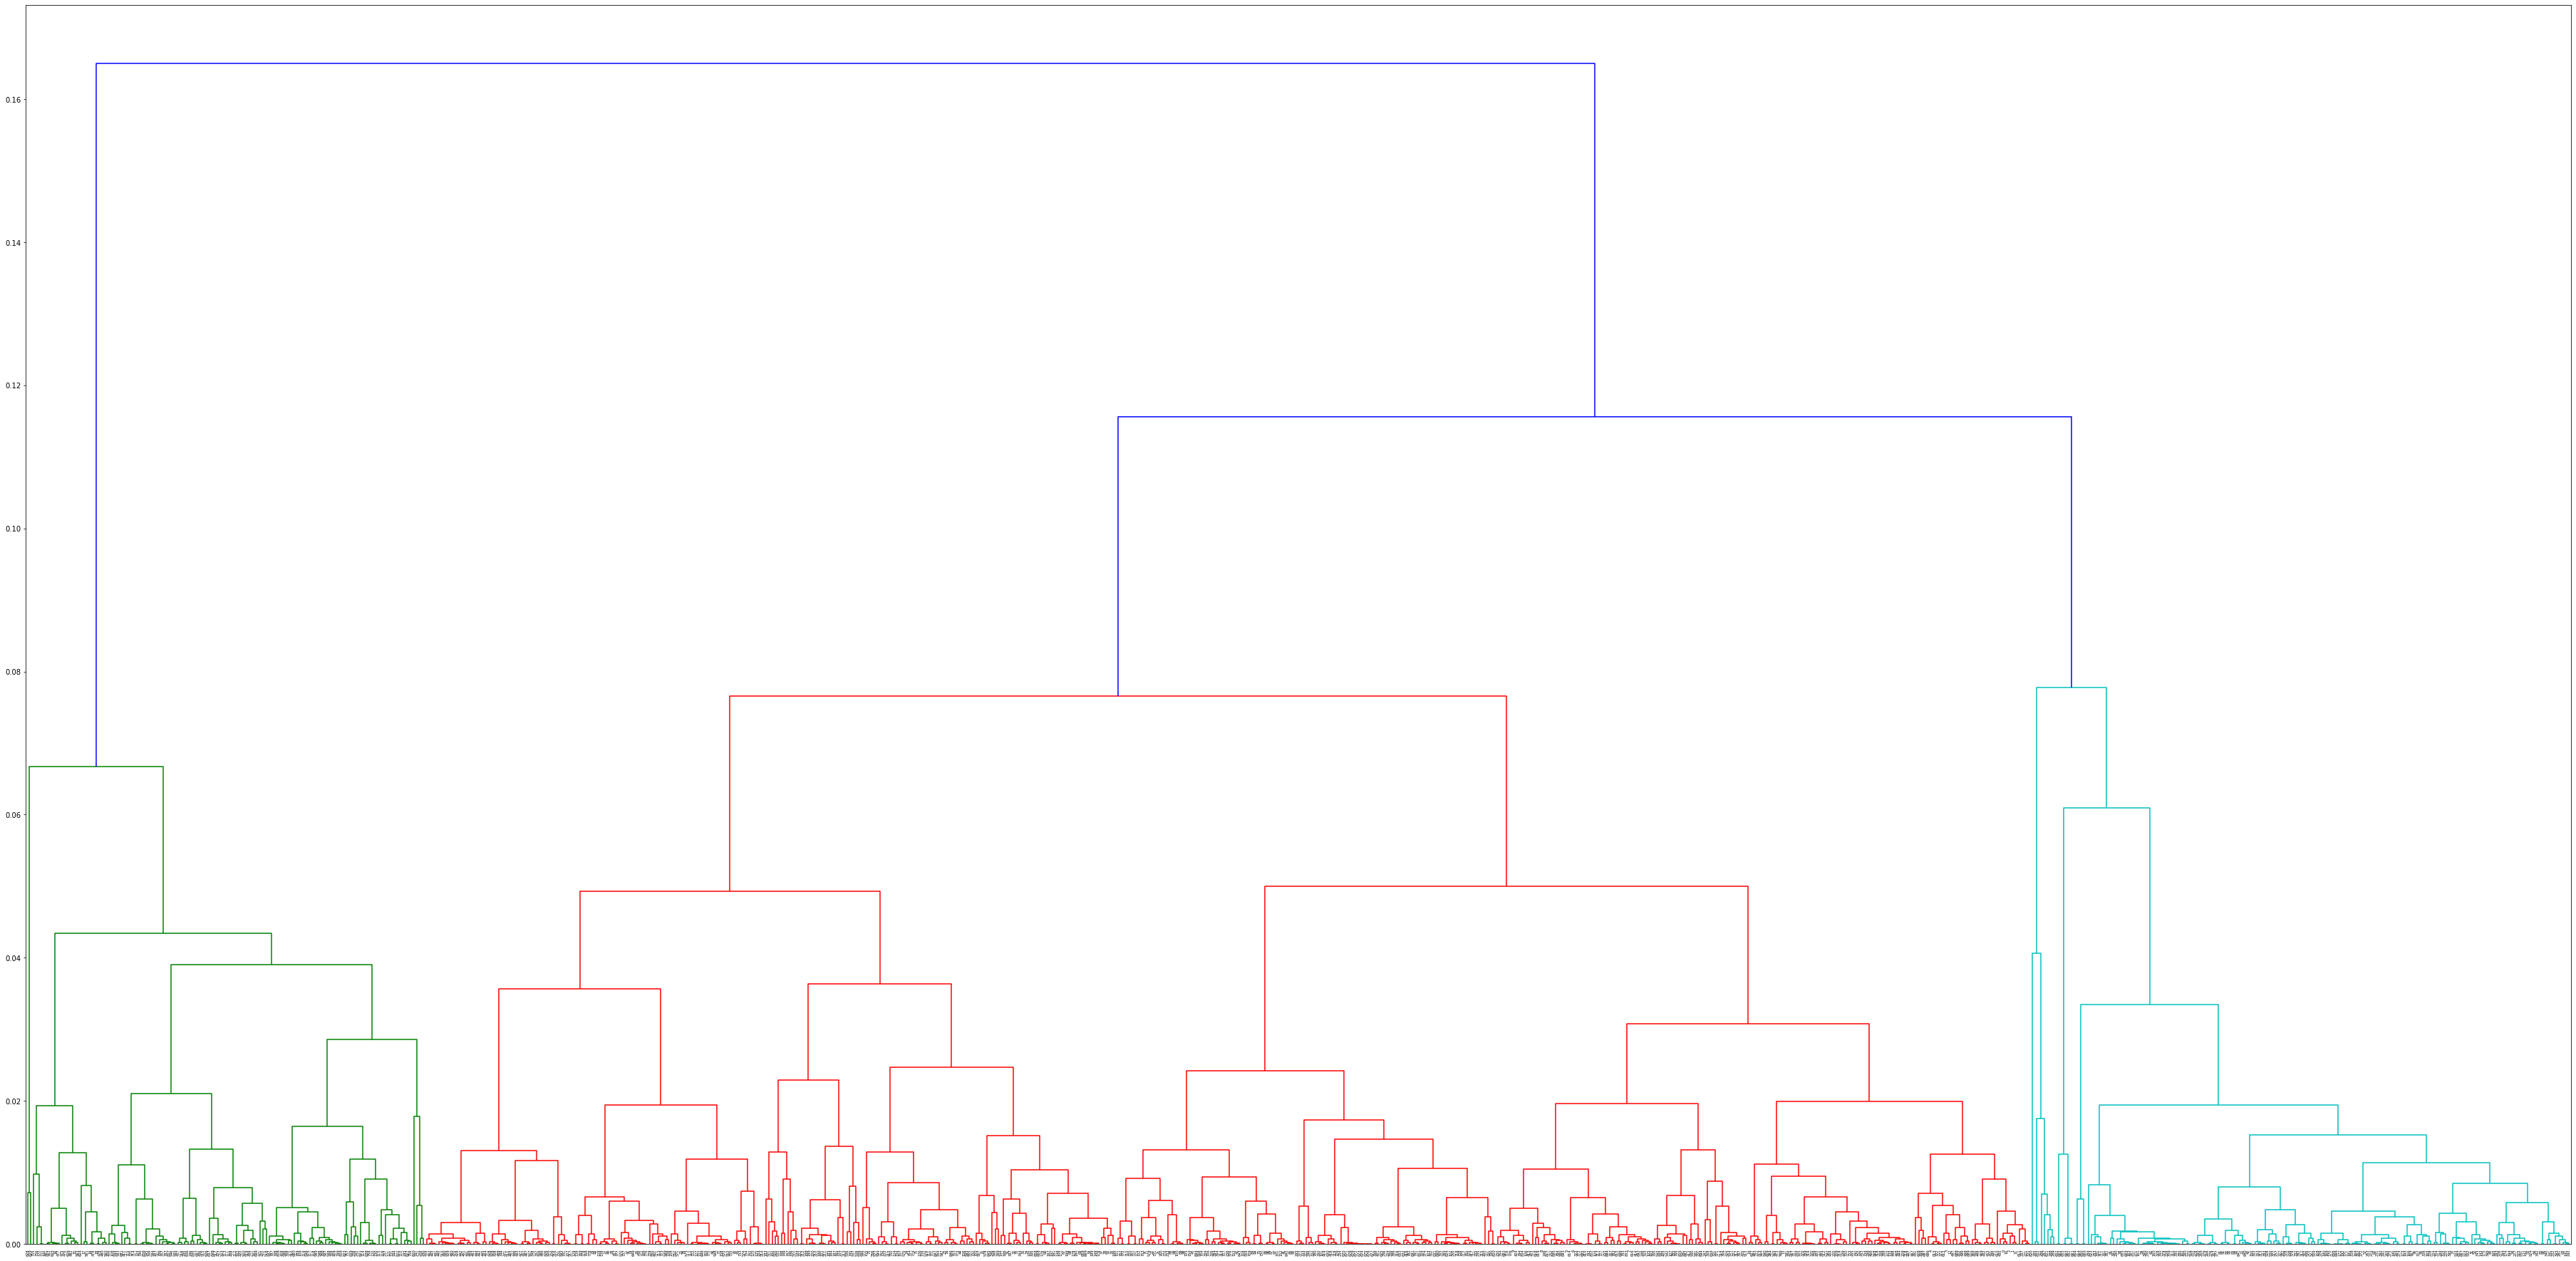

In [24]:
linked2 = linkage(X, 'complete')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked2,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

In [25]:
c2=cophenet(linked2,pdist(X))
c2

(0.6663436788527682,
 array([0.00145305, 0.00145305, 0.01250059, ..., 0.03900114, 0.03900114,
        0.00508868]))

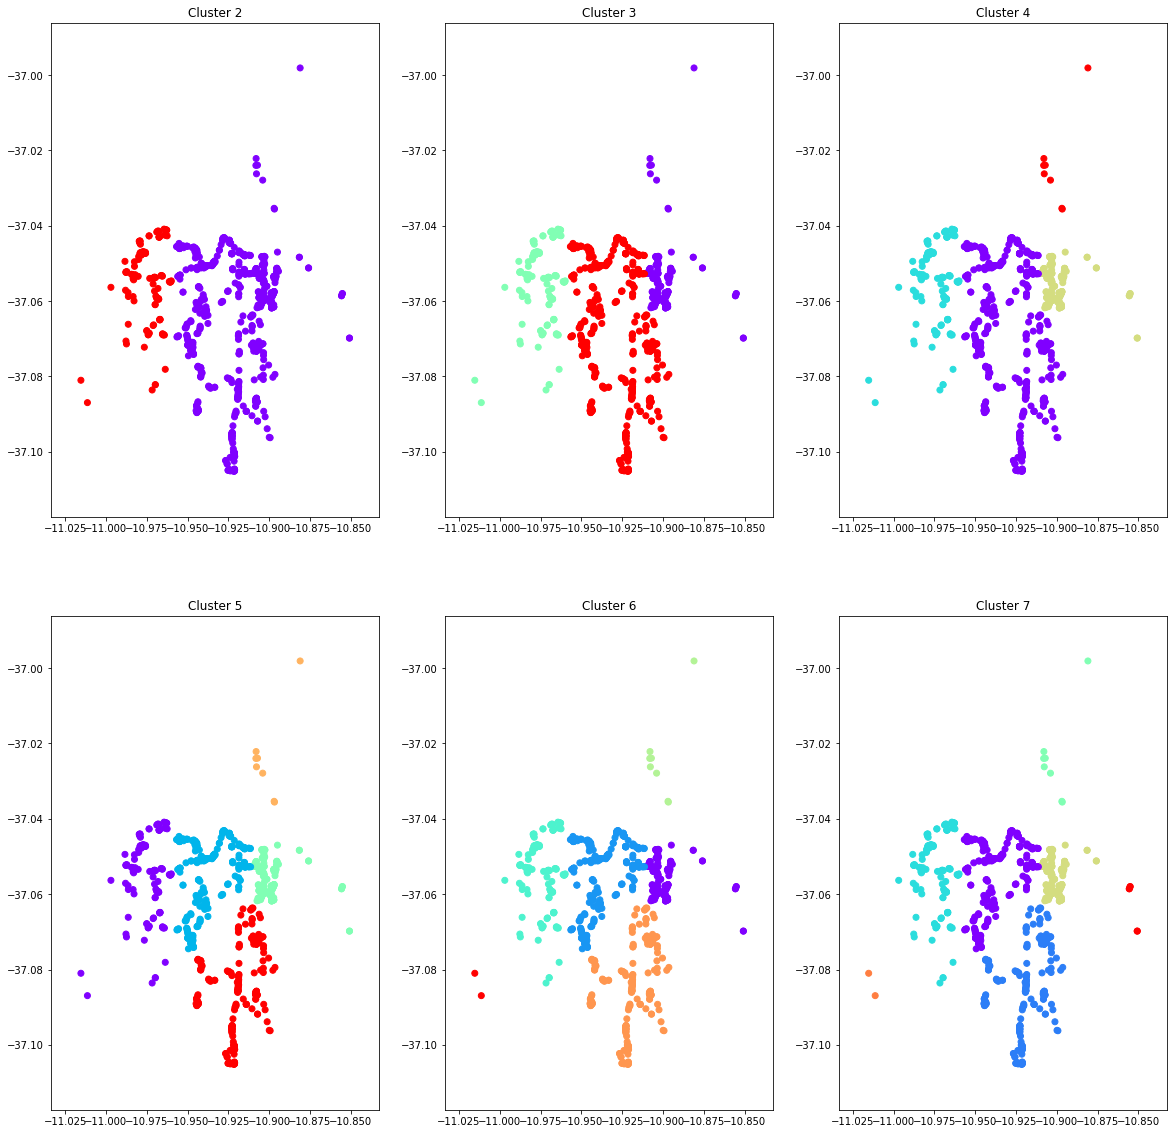

In [44]:
from sklearn.cluster import AgglomerativeClustering
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,20))
j=0
k=0
for i in [2,3,4,5,6,7]:
    
    clusters=[]
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')  
    clusters.append(cluster.fit_predict(X)) 
    axes[k,j].title.set_text("Cluster "+str(i))
    axes[k,j].scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow') 
    j+=1
    if(j==3):
        k+=1
        j=0
    if(k==3):
        break
    

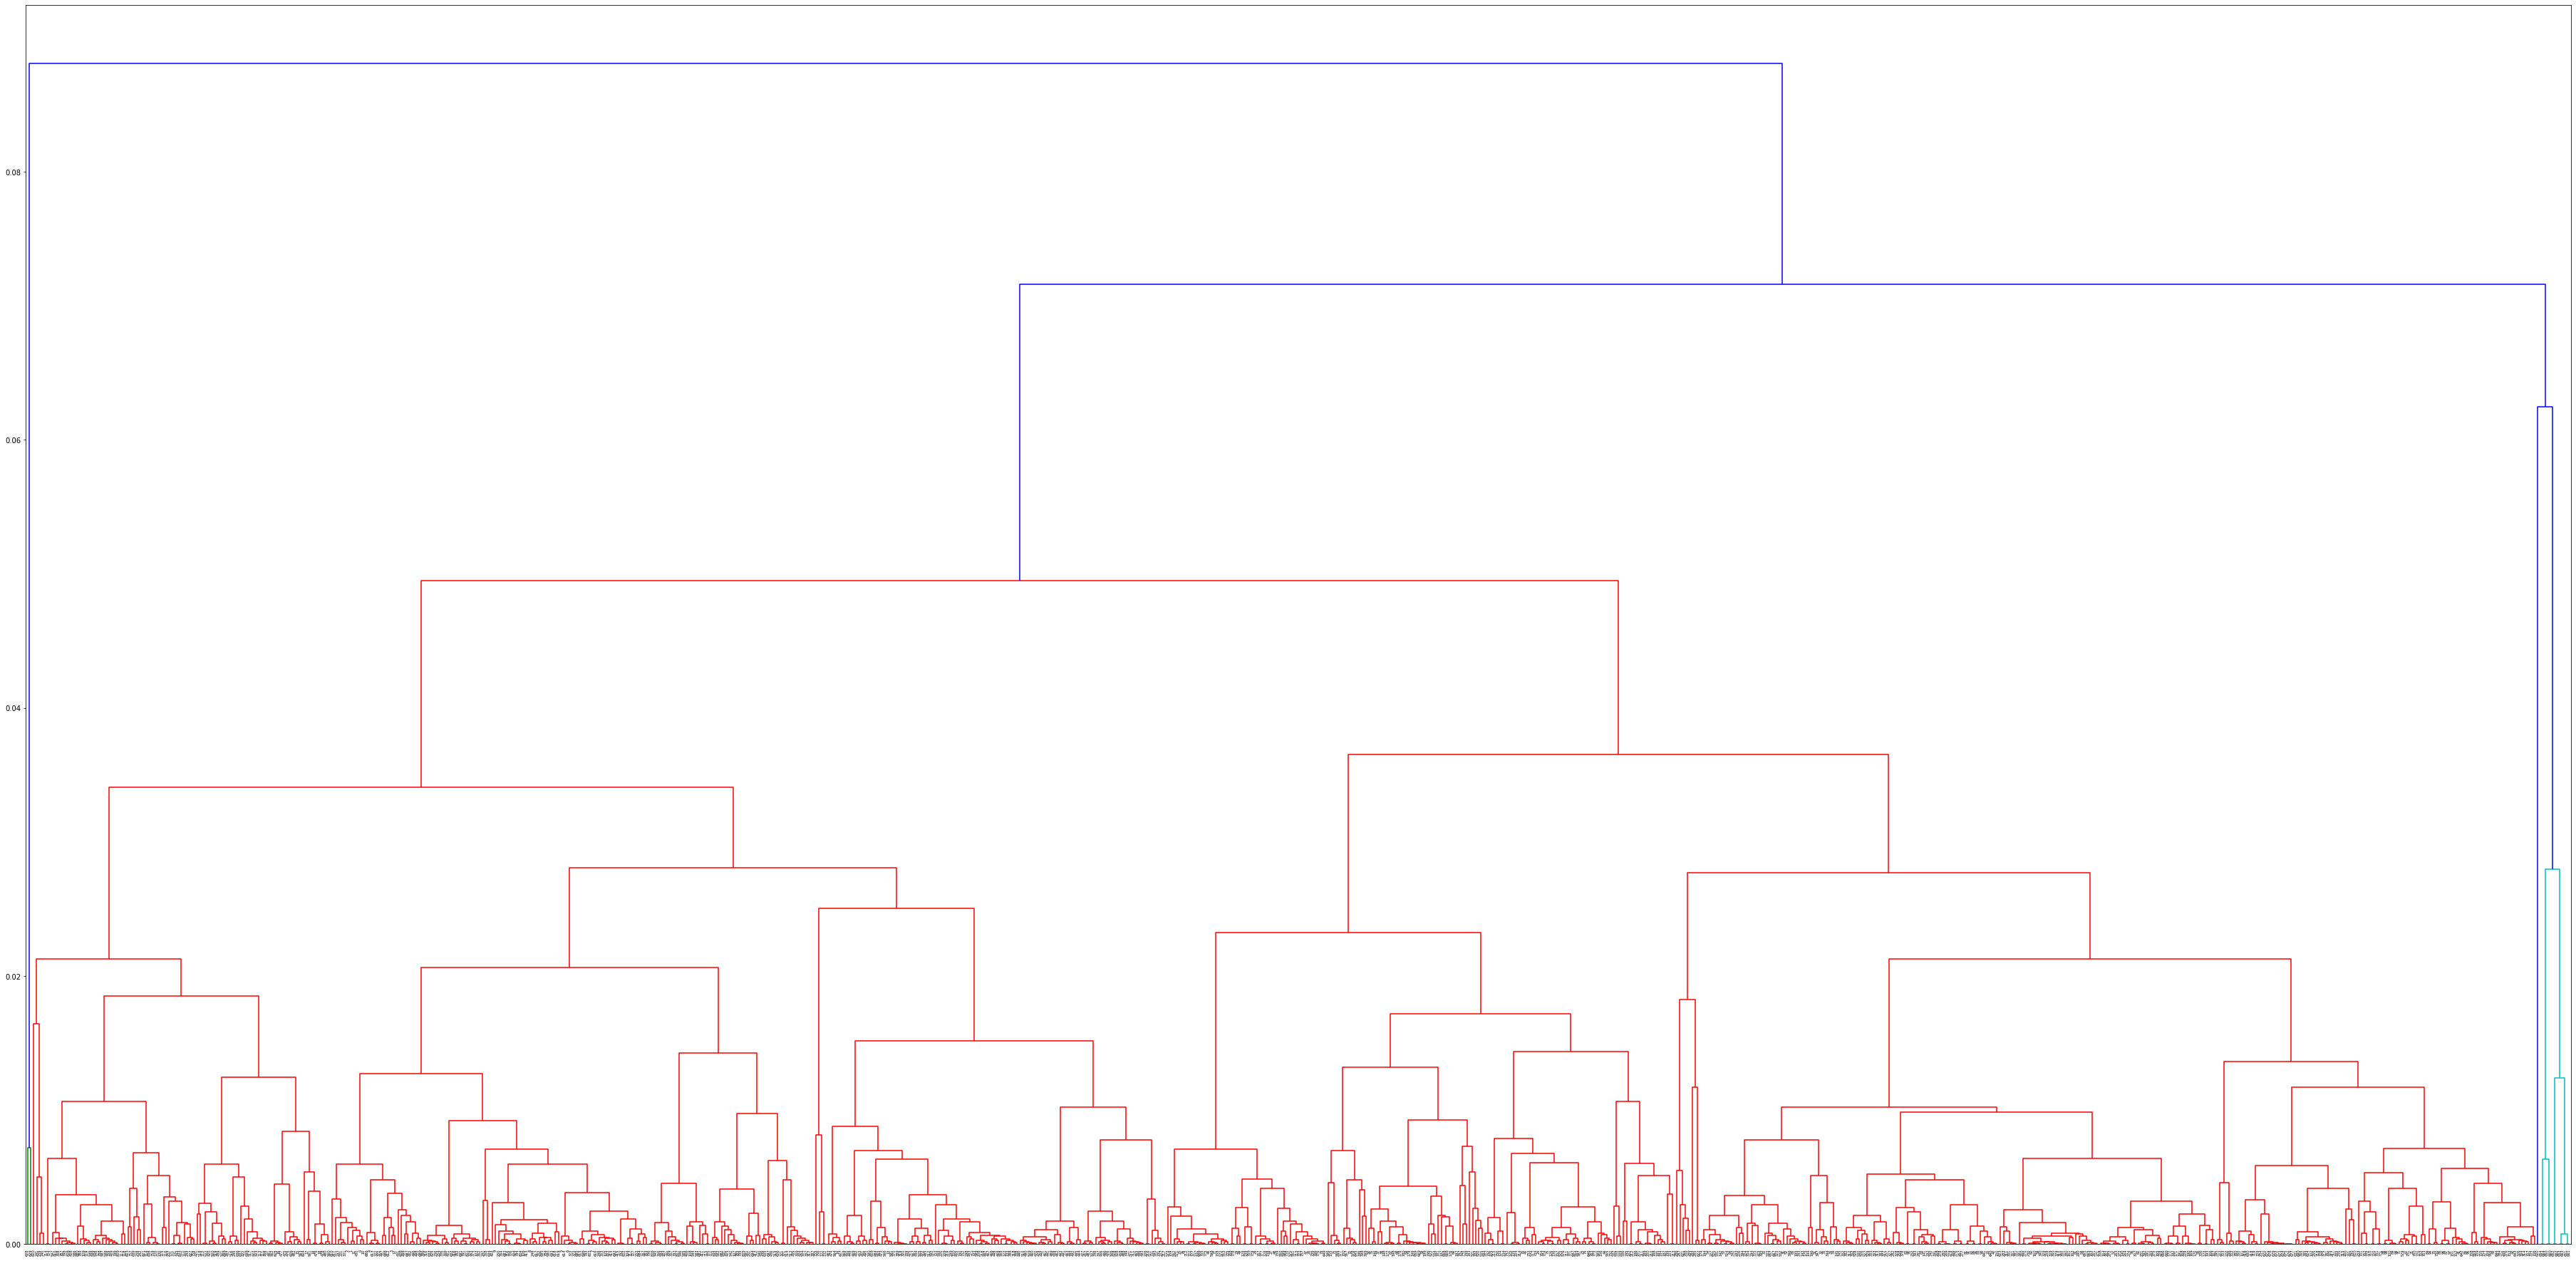

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked4 = linkage(X, 'average')

labelList = range(len(X))

plt.figure(figsize=(64, 32))  
dendrogram(linked4,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
max_d=100
plt.show()

In [57]:
c4=cophenet(linked4,pdist(X))
c4

(0.7373574471821873,
 array([0.00098734, 0.00123228, 0.00594048, ..., 0.03408204, 0.03408204,
        0.00367309]))

In [100]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete') 
cluster.fit_predict(X)
;

''

# Davies Bouldin Index

In [101]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X,cluster.labels_)
db_score

0.7502686829970208

# Dunn Index

In [102]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000

    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [103]:
dic = {0:[],1:[],2:[],3:[],4:[],5:[]}
pt=1
for x in cluster.labels_:
    dic[x].append(pt)
    pt+=1

In [104]:
dunn_score = dunn([dic[0],dic[1],dic[2],dic[3],dic[4]])
dunn_score

0.0012422360248447205

# Silhouette

In [105]:
from sklearn.metrics import silhouette_score

In [106]:
ss = silhouette_score(X,cluster.labels_)
ss

0.4036281778559927

# Average

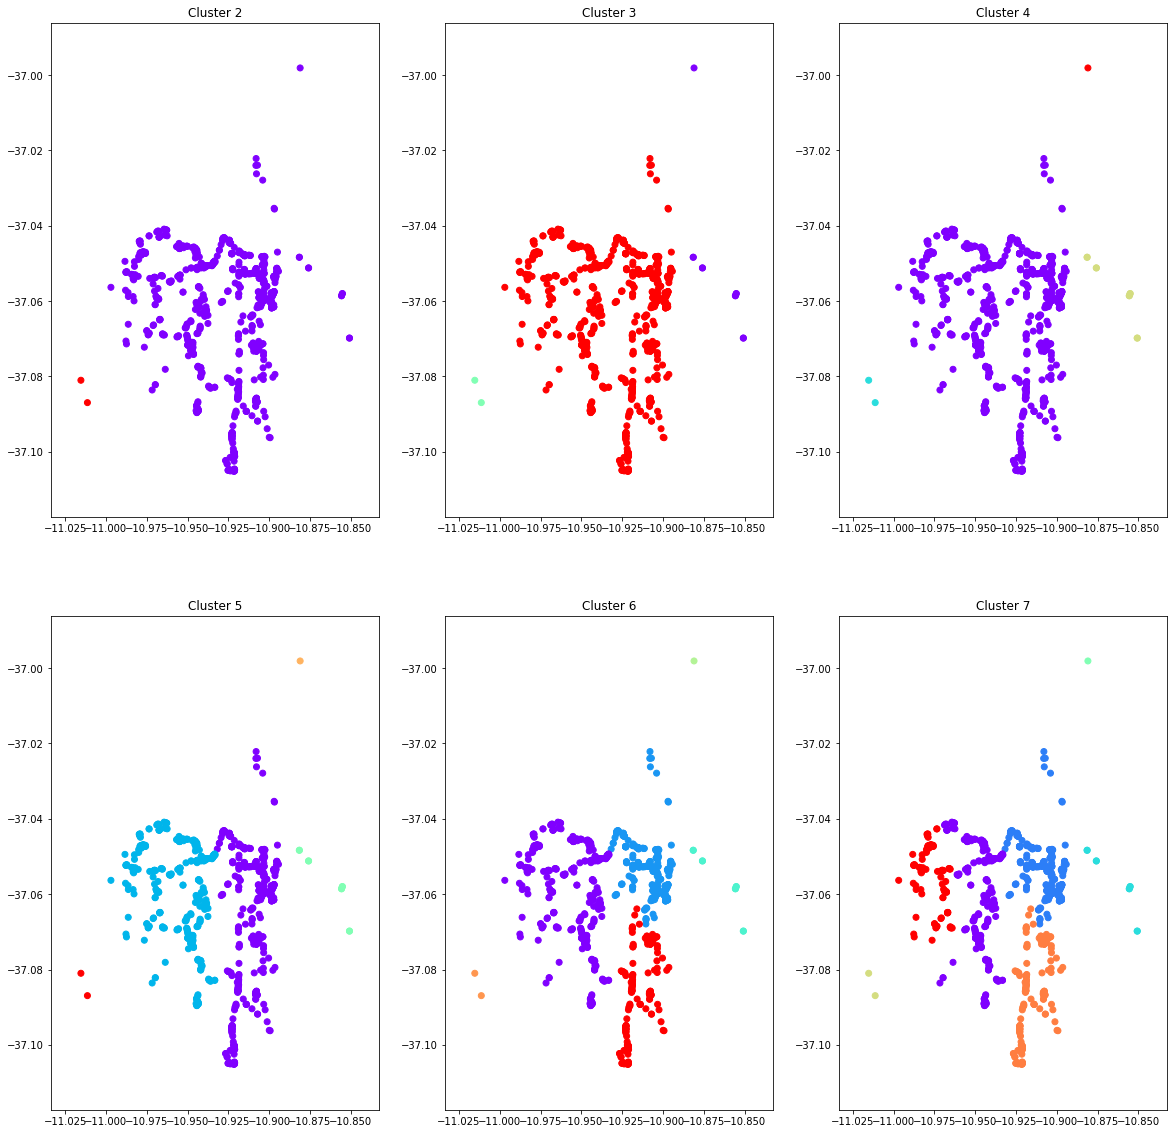

In [59]:
from sklearn.cluster import AgglomerativeClustering
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,20))
j=0
k=0
for i in [2,3,4,5,6,7]:
    
    clusters=[]
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')  
    clusters.append(cluster.fit_predict(X)) 
    axes[k,j].title.set_text("Cluster "+str(i))
    axes[k,j].scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow') 
    j+=1
    if(j==3):
        k+=1
        j=0
    if(k==3):
        break
    

In [93]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average') 
cluster.fit_predict(X)
;

''

# Davies Bouldin Index

In [94]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X,cluster.labels_)
db_score

0.603344711583115

# Dunn Index

In [95]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000

    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [96]:
dic = {0:[],1:[],2:[],3:[],4:[],5:[]}
pt=1
for x in cluster.labels_:
    dic[x].append(pt)
    pt+=1

In [97]:
dunn_score = dunn([dic[0],dic[1],dic[2],dic[3],dic[4]])
dunn_score

0.0012360939431396785

# Silhouette

In [98]:
from sklearn.metrics import silhouette_score

In [99]:
ss = silhouette_score(X,cluster.labels_)
ss

0.40384921521212547